In [1]:
##Q1
import pandas as pd
import numpy as np

# generate ID in the format IDxxx
def generate_id():
    return f"ID{np.random.randint(100, 1000)}"

num_samples = 800

# Create empty lists to store data
ids = [generate_id() for _ in range(num_samples)]
groups = np.random.choice(['A', 'B', 'C'], num_samples)
feature_1 = np.random.normal(2500, 150, num_samples)
feature_2 = np.random.normal(400, 15, num_samples)

# Calculate Feature_3 based on Group feature
feature_3 = []
for group, f1, f2 in zip(groups, feature_1, feature_2):
    if group == 'A':
        feature_3.append(3*f1 - 5*f2 + np.random.normal(0, 12))
    elif group == 'B':
        feature_3.append(2*f1 + np.random.normal(0, 12))
    else:
        feature_3.append(-f1 + f2 + np.random.normal(0, 12))

# Create a dictionary to construct the DataFrame
data = {
    'ID': ids,
    'Group': groups,
    'Feature_1': feature_1,
    'Feature_2': feature_2,
    'Feature_3': feature_3
}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)


In [2]:
#Q2a
import scipy.stats as stats

# Parameters for the normal distribution
mean = 2500
std_dev = 150

# Calculate Z-scores for the percentiles
z_score_2200 = (2200 - mean) / std_dev
z_score_2800 = (2800 - mean) / std_dev

# Calculate the proportion between 2200 and 2800
proportion_between_2200_2800 = stats.norm.cdf(z_score_2800) - stats.norm.cdf(z_score_2200)

# Calculate the proportion greater than 3000
proportion_gt_3000 = 1 - stats.norm.cdf((3000 - mean) / std_dev)

# Calculate the expected number of samples greater than 3000
num_samples = 800
expected_samples_gt_3000 = num_samples * proportion_between_2200_2800 * proportion_gt_3000

print(f"Expected number of samples where Feature_1 is greater than 3000: {expected_samples_gt_3000:.2f}")


/Users/sangdi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Expected number of samples where Feature_1 is greater than 3000: 0.33


In [3]:
#Q2b
#count the numbe rof samples where Feature_1 is greater than 3000
num_samples_gt_3000 = df[df['Feature_1'] > 3000].shape[0]
print(f"the number of samples where Feature_1 is greater than 3000: {num_samples_gt_3000:.2f}")

the number of samples where Feature_1 is greater than 3000: 1.00


In [4]:
#Q23
# Grouping by 'Group' field and computing mean and standard deviation of 'Feature_3'
gdf = df.groupby('Group')['Feature_3'].agg(['mean', 'std'])

print(gdf)

              mean         std
Group                         
A      5484.283014  441.170219
B      5014.161209  292.370708
C     -2099.030507  159.429890


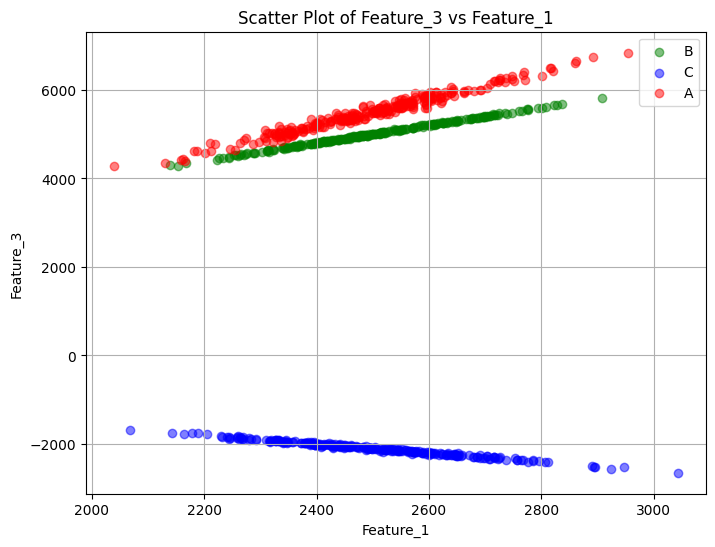

In [5]:
#Q3
import matplotlib.pyplot as plt

# Define colors for each group
colors = {'A': 'red', 'B': 'green', 'C': 'blue'}

# Scatter plot of Feature_3 vs Feature_1 with color and size based on 'Group'
plt.figure(figsize=(8, 6))
for group in df['Group'].unique():
    plt.scatter(
        df[df['Group'] == group]['Feature_1'],
        df[df['Group'] == group]['Feature_3'],
        alpha=0.5,
        c=colors[group],
        label=group
    )

plt.xlabel('Feature_1')
plt.ylabel('Feature_3')
plt.title('Scatter Plot of Feature_3 vs Feature_1')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
#Q4
# Save DataFrame to CSV file
df.to_csv('fake_data.csv', index=False)